# Types of Unsupervised Learning
There are two main types: transformationsof the dataset and clustering.
## ✅ 1. **Unsupervised Transformation (数据集变换)**

> *Creating a new representation of data that may be easier for humans or other ML algorithms to understand.*

### ➤ Common Application: **Dimensionality Reduction (降维)**

- Takes high-dimensional data (e.g., 100 features) → reduces it to fewer dimensions (e.g., 2D or 3D).
- Goal: Keep important structure while removing noise/redundancy.
- Example: Visualizing customer segments in 2D instead of 50D.

### ➤ Another Application: **Topic Extraction (主题提取)**
- Used in text analysis.
- Finds hidden themes in documents (e.g., “election”, “guns”, “music”).
- Useful for tracking social media trends.
  
## ✅ 2. **Clustering Algorithms (聚类算法)**

> *Divide data into groups where items within each group are similar.*

### ➤ Real-World Example: Photo Organization

Imagine uploading photos to a social media site:

- The system doesn’t know who is in each photo.
- But it can extract faces → group similar-looking faces together → assume they belong to the same person.

➡️ That’s clustering!

> 💡 Clustering finds structure **without being told what the groups should be**.

---

# ⚠️Challenges of Unsupervised Learning

> “The main challenge is evaluating whether the algorithm learned something useful.”

Unlike supervised learning (where you have true labels to measure accuracy), here:

- ❗ There’s **no ground truth**.
- ❗ You can’t say “this model is 95% correct.”
- ❗ Evaluation often requires **human inspection**.

## So… When Should You Use It?

✅ For **exploratory analysis** — to understand your data better.

✅ As a **preprocessing step** for supervised learning:

- Reduce dimensionality → faster training
- Remove noise → improve model performance
- Create new features → boost accuracy

> 🎯 Think of unsupervised learning as a **data detective** — helping you discover what’s hiding inside your dataset.

# Preprocessing & Scaling

> “Some algorithms (like Neural Networks and SVM) are very sensitive to feature scaling.”

So before feeding data into these models, we usually **scale or transform** features to make them more suitable.

Let’s look at Figure 3-1 — which shows 5 different preprocessing methods applied to the same 2D dataset.
## Different ways to rescale and preprocess a dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

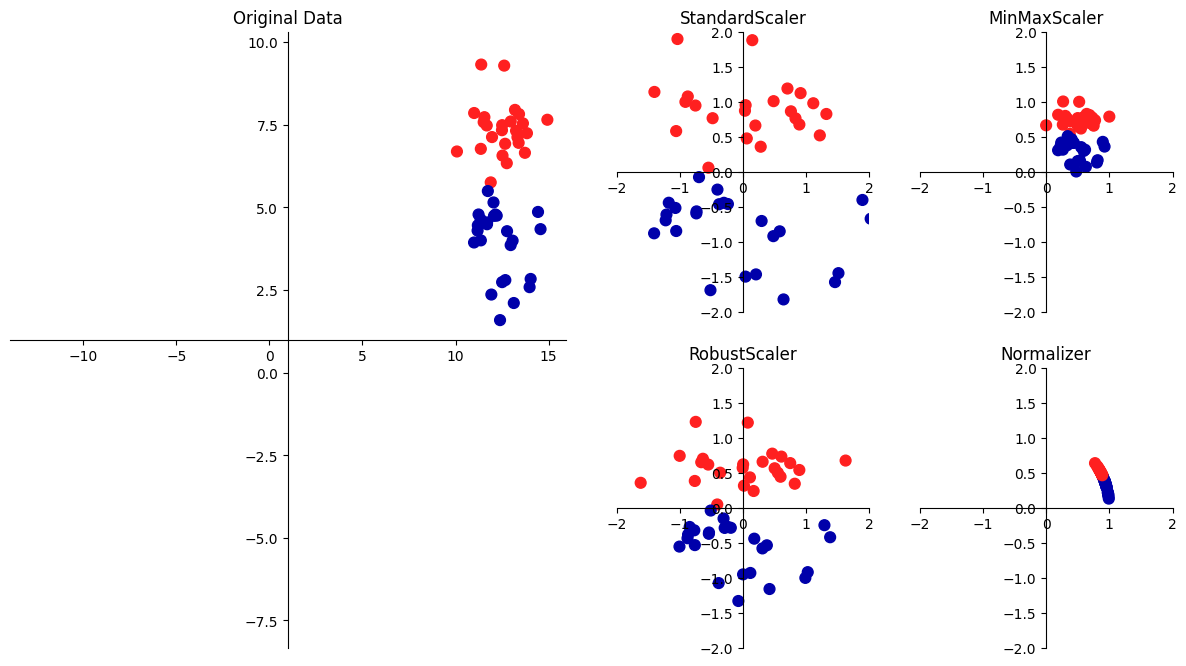

In [2]:
mglearn.plots.plot_scaling()

##  Different Kinds of Preprocessing
 The first plot in Figure 3-1 shows a synthetic two-class classification dataset with twofeatures. 
 
The first feature (the x-axis value) is between 10 and 15. The second feature (the y-axis value) is between around 1 and 9.

--------

The following four plots show four different ways to transform the data that yield
 more standard ranges. 

 
| Plot | Method | What It Does |
| --- | --- | --- |
| Original Data | — | Raw data — x-axis: ~10–15, y-axis: ~1–9 |
| StandardScaler | Z-score scaling | Mean = 0, Std = 1 → all features on same scale |
| MinMaxScaler | Range scaling | Scales to \[0, 1\] → min becomes 0, max becomes 1 |
| RobustScaler | Median-based | Uses median & IQR → ignores outliers |
| Normalizer | Length normalization | Makes each point have unit length → good when direction matters, not size |

------


**RobustScaler**
However, the RobustScaler uses the median and **quartiles**（四分位数）, instead of mean and variance. 

This makes the RobustScaler ignore data points that are verydifferent from the rest (like measurement errors). 

These odd data points are also called **outliers**（异常值）, and can lead to trouble for other scaling techniques.

----------

**Normalizer**
the Normalizer does a very different kind of rescaling. 

It scales each datapoint such that the feature vector has a Euclidean length(欧式长度) of 1. In other words, itprojects a data point on the circle (or sphere, in the case of higher dimensions) with aradius of 1. 

This means every data point is scaled by **a different number** (by theinverse of its length). 

This normalization is often used when ***only the direction (orangle) of the data matters, not the length of the feature vector***

## Apply on the cancer dataset
Preprocessing methods like the scalers are usually applied before applying a supervised
 machine learning algorithm. 

As an example, say we want to apply the kernel SVM
 (SVC) to the cancer dataset, and use MinMaxScaler for preprocessing the data.

### load the data and split it
We start by loading our dataset and splitting it into a training set and a test set (we need
 separate training and test sets to evaluate the supervised model we will build after the
 preprocessing):

In [4]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.model_selection import train_test_split
 cancer = load_breast_cancer()
 X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)
 print(X_train.shape)
 print(X_test.shape)

(426, 30)
(143, 30)


 As a reminder, the dataset contains 569 data points, each represented by 30 measure
ments. We split the dataset into 426 samples for the training set and 143 samples for
 the test set.
 
### instantiate the scaler
As with the supervised models we built earlier, we first import the class that imple
ments the preprocessing, and then instantiate it(实例化):

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### fit the scaler on training data only
We then fit the scaler using the fit method, applied to the training data. 

For the MinMaxScaler, the fit method computes the minimum and maximum value of each fea
ture on the training set. 

In contrast to the classifiers and regressors of Chapter 2, the scaler is only provided with the data (X_train) when fit is called, and y_train is not
 used:

In [6]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


### transform it
 To apply the transformation that we just learned—that is, to actually scale the training
 data—we use the transform method of the scaler. 
     
The transform method is used in scikit-learn whenever a model returns a new representation of the data:

In [10]:
 # transform data
X_train_scaled = scaler.transform(X_train)
 # print dataset properties before and after scaling
np.set_printoptions(suppress=True, precision=4) # 删去这个就是科学计数法的表现形式
print("transformed shape: {}".format(X_train_scaled.shape))

print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))

print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
 
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))

print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981    9.71    43.79   143.5      0.0526   0.0194   0.       0.
   0.106    0.0502   0.1153   0.3602   0.757    6.802    0.0017   0.0023
   0.       0.       0.0095   0.0009   7.93    12.02    50.41   185.2
   0.0712   0.0273   0.       0.       0.1566   0.0552]
per-feature maximum before scaling:
 [  28.11     39.28    188.5    2501.        0.1634    0.2867    0.4268
    0.2012    0.304     0.0958    2.873     4.885    21.98    542.2
    0.0311    0.1354    0.396     0.0528    0.0615    0.0298   36.04
   49.54    251.2    4254.        0.2226    0.9379    1.17      0.291
    0.5774    0.1486]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### scientific notation explain
6.981e+00  6.981

5.263e-02  0.05263

e+n = multiply by 10^n

e-n = divide by 10^n 

**how to turn on/off**

```python
import numpy as np

np.set_printoptions(suppress=True, precision=4)
```
✅ `suppress=True` → hides scientific notation  
✅ `precision=4` → shows 4 decimal places



The transformed data has the same shape as the original data—the features are simply
 shifted and scaled. 
 
 You can see that all of the features are now between 0 and 1, as
 desired.

 ### transform the test set
 
 To apply the SVM to the scaled data, we also need to transform the test set. This is
 again done by calling the transform method, this time on X_test:

In [11]:
 # transform test data
 X_test_scaled = scaler.transform(X_test)
 # print test data properties after scaling
 print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
 print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336  0.0227  0.0314  0.0114  0.1413  0.0441  0.      0.      0.154
 -0.0062 -0.0014  0.0059  0.0043  0.0008  0.0392  0.0112  0.      0.
 -0.0319  0.0066  0.0266  0.0581  0.0203  0.0094  0.1094  0.0264  0.
  0.     -0.0002 -0.0018]
per-feature maximum after scaling:
[0.9579 0.815  0.9558 0.8935 0.8113 1.2196 0.8796 0.9334 0.9323 1.0371
 0.4267 0.4977 0.4412 0.2837 0.487  0.7386 0.7672 0.6293 1.3369 0.3906
 0.8961 0.7932 0.8486 0.7449 0.9155 1.1319 1.0701 0.9237 1.2053 1.6307]


#### **Why Test Set Min/Max ≠ 0 and 1**
Maybe somewhat surprisingly, you can see that for the test set, after scaling, the mini
mum and maximum are not 0 and 1. 

Some of the features are **even outside the 0–1 range**! 

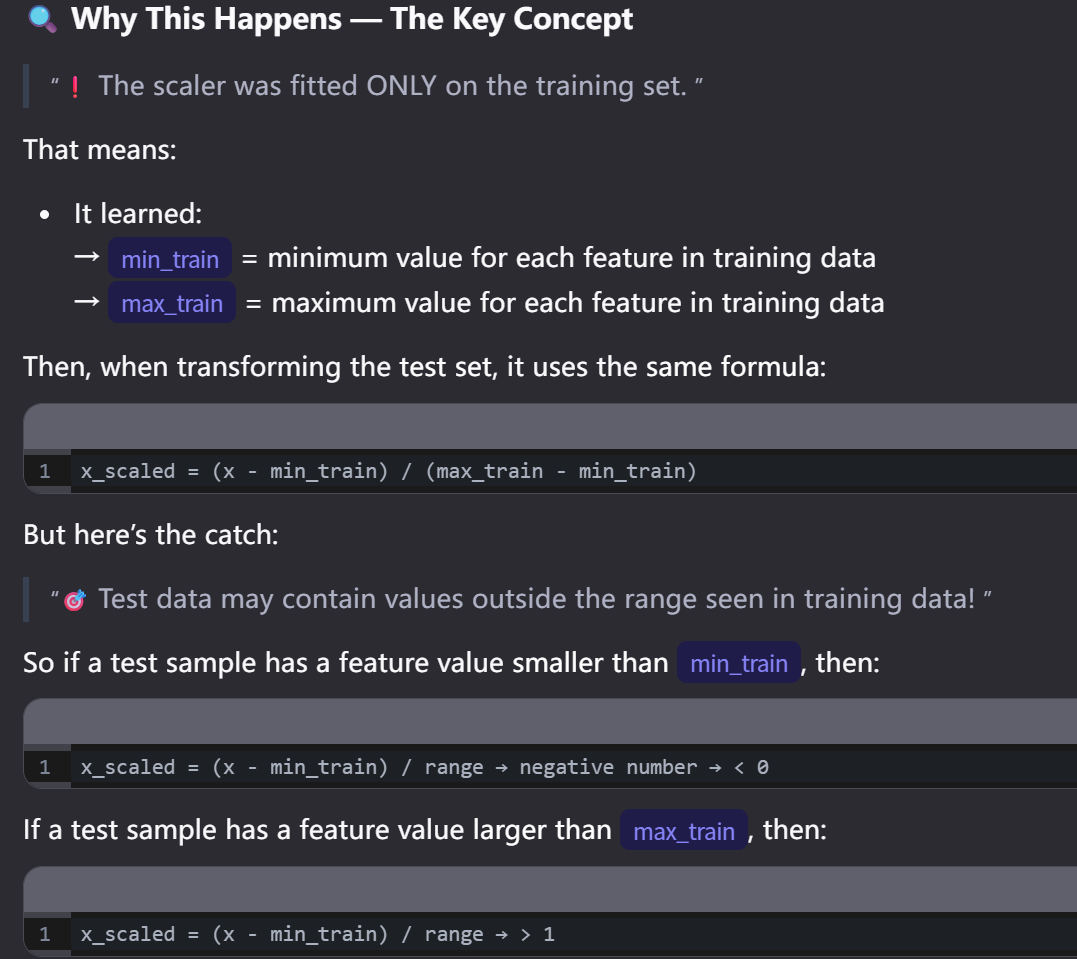

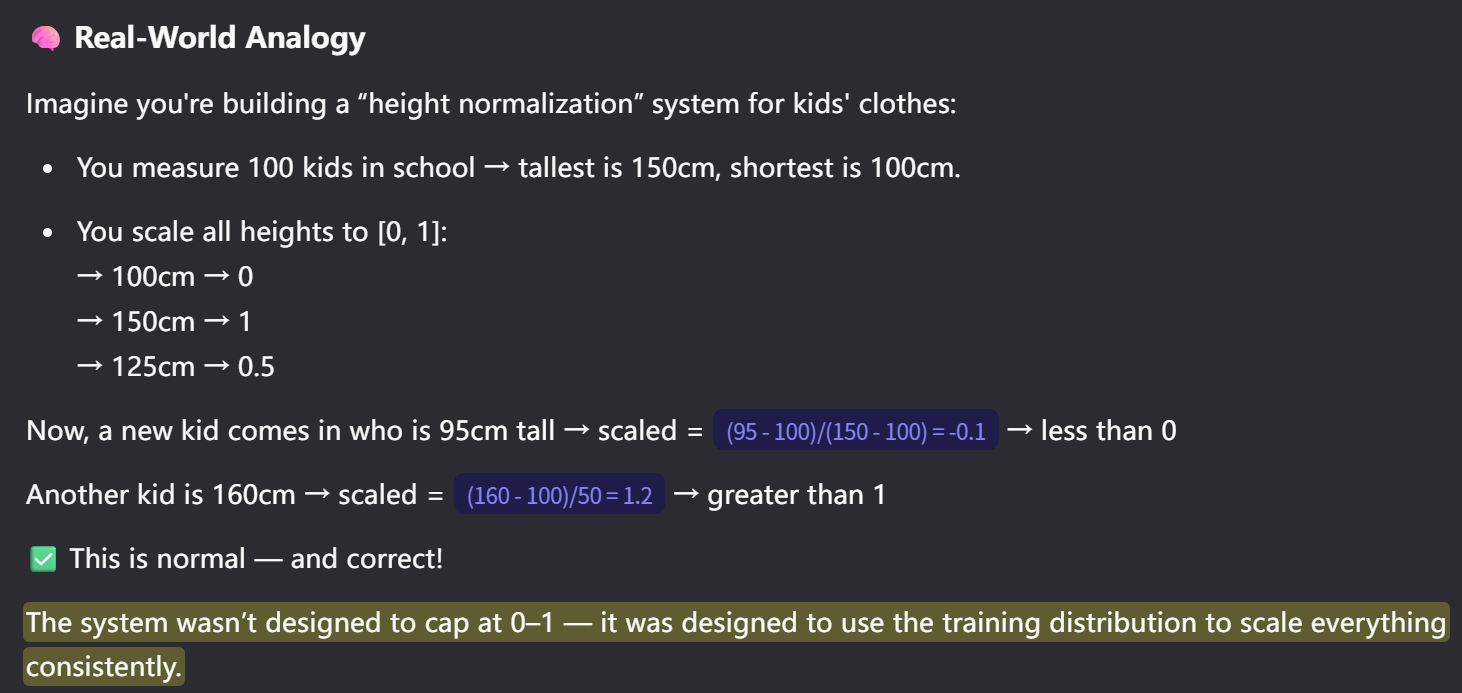

The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. 
    
This means the transform method always **subtracts the training set minimum and divides by the
 training set range**, which might be different from the minimum and range for the test
 set

## Scaling Training and Test Data the Same Way

 It is important to apply exactly the same transformation to the training set and the
 test set for the supervised model to work on the test set. The following example
 (Figure 3-2) illustrates what would happen if we were to use the minimum and range
 of the test set instead:

C:\Users\22483\AppData\Local\Temp\ipykernel_2824\1511130193.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\22483\AppData\Local\Temp\ipykernel_2824\1511130193.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\22483\AppData\Local\Temp\ipykernel_2824\1511130193.py:25: UserWarning: *c* argument looks l

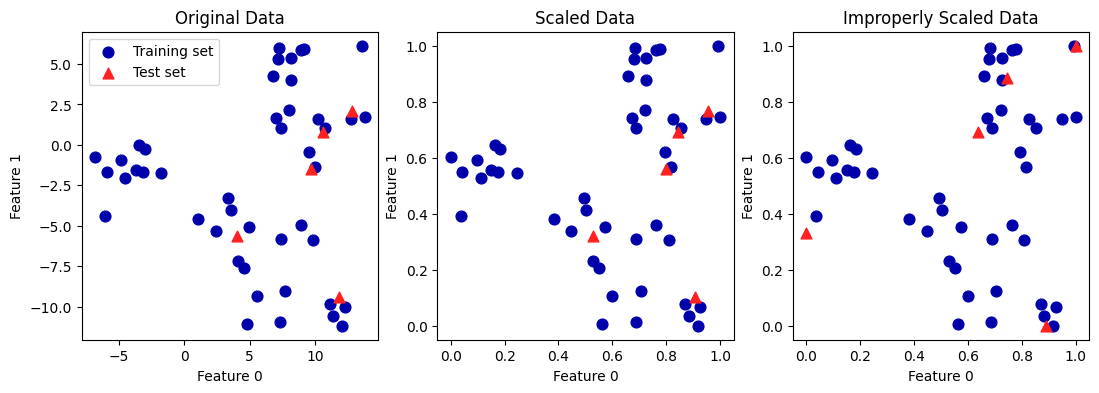

In [18]:
 from sklearn.datasets import make_blobs

 # make synthetic data (构造数据)
 X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

 # split it into training and test sets
 X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

 # plot the training and test sets
 fig, axes = plt.subplots(1, 3, figsize=(13, 4))
 axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
 axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
 axes[0].legend(loc='upper left')
 axes[0].set_title("Original Data")
 
 # scale the data using MinMaxScaler
 scaler = MinMaxScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # visualize the properly scaled data
 axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
 axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
 axes[1].set_title("Scaled Data")

 # rescale the test set separately（单独对测试集进行缩放）
 # so test set min is 0 and test set max is 1
 # DO NOT DO THIS! For illustration purposes only.
 test_scaler = MinMaxScaler()
 test_scaler.fit(X_test)
 X_test_scaled_badly = test_scaler.transform(X_test)

 # visualize wrongly scaled data
 axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="training set", s=60)
 axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
 marker='^', c=mglearn.cm2(1), label="test set", s=60)
 axes[2].set_title("Improperly Scaled Data")
 for ax in axes:
     ax.set_xlabel("Feature 0")
     ax.set_ylabel("Feature 1")

图3-2：对左图中的训练数据和测试数据同时缩放的效果（中）和分别缩放的效果（右）

**The first panel** is an unscaled two-dimensional dataset

**The second panel** is the same data, butscaled using the MinMaxScaler. Here, we called fit on the training set, and then
 called transform on the training and test sets. 
     
You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed. Now all
 the features are between 0 and 1. 
    
You can also see that the minimum and maximumfeature values
for the test data (the triangles) are not 0 and 1

**The third panel** shows what would happen if we scaled the training set and test set
 separately. In this case, the minimum and maximum feature values for both the train
ing and the test set are 0 and 1. 

But now the dataset looks different. The test points moved incongruously to the training set, as they were scaled differently. We changed
 the arrangement of the data in an arbitrary way. 
     
Clearly this is not what we want to do.

### Shortcuts and Efficient Alternatives
 Often, you want to fit a model on some dataset, and then transform it. This is a very
 common task, which can often be computed more efficiently than by simply calling
 fit and then transform. For this use case, all models that have a transform method
 also have a fit_transform method. Here is an example using StandardScaler:
 
```python
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 # calling fit and transform in sequence (using method chaining)
 X_scaled = scaler.fit(X).transform(X)
 # same result, but more efficient computation
 X_scaled_d = scaler.fit_transform(X)
```
While fit_transform is not necessarily more efficient for all models, it is still good
 practice to use this method when trying to transform the training set.

## The Effect of Preprocessing on Supervised Learning
 Now let’s go back to the cancer dataset and see the effect of using the MinMaxScaler
 on learning the SVC (this is a different way of doing the same scaling we did in Chap
ter 2). 

First, let’s fit the SVC on the original data again for comparison:

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=0)
svm = SVC(C=100,kernel='rbf') # default is rbf
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


 Now, let’s scale the data using MinMaxScaler before fitting the SVC:

In [27]:
 # preprocessing using 0-1 scaling
 scaler = MinMaxScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # learning an SVM on the scaled training data
 svm.fit(X_train_scaled, y_train)

 # scoring on the scaled test set
 print("Scaled test set accuracy: {:.2f}".format(
 svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


As we saw before, the effect of scaling the data is quite significant.

Even though scal
ing the data doesn’t involve any complicated math, it is good practice to use the scal
ing mechanisms provided by scikit-learn instead of reimplementing them yourself,
 as it’s easy to make mistakes even in these simple computations.

You can also easily **replace one preprocessing algorithm with anothe**r by changing the
 class you use, as all of the preprocessing classes **have the same interface**m, consisting of
 the fit and transform methods:

As we saw before, the effect of scaling the data is quite significant.

(我也不知道为什么不能reproduce书上的0.63)

Even though scaling the data doesn’t involve any complicated math, it is good practice to use the scaling mechanisms provided by scikit-learn instead of reimplementing them yourself,
 as it’s easy to make mistakes even in these simple computations.

You can also easily **replace one preprocessing algorithm with anothe**r by changing the
 class you use, as all of the preprocessing classes **have the same interface**m, consisting of
 the fit and transform methods:

In [31]:
 # preprocessing using zero mean and unit variance scaling
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)
 X_train_scaled = scaler.transform(X_train)
 X_test_scaled = scaler.transform(X_test)

 # learning an SVM on the scaled training data
 svm.fit(X_train_scaled, y_train)
 
 # scoring on the scaled test set
 print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Now that we’ve seen how simple data transformations for preprocessing work, let’s
 move on to more interesting transformations using unsupervised learning.

#  Dimensionality Reduction, Feature Extraction, and Manifold Learning